### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./clients.csv", index_col=False)
pd.set_option('display.max_columns', len(df.columns))
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

Перевел цену в int для удобной работы.

In [4]:
df.rename(columns={'Price': 'Price in cents'}, inplace=True)
df['Price in cents'] = df['Price in cents'].replace('\W', '', regex=True).astype(int)

Проверили, что все входения без дат рождения это покупка фирмами, и все вхождения без указания штата это прочие страны.

In [5]:
print(df['Entity'][df['Age at time of purchase'].isnull()].tolist())
print(df['Country'][df['State'].isnull()].tolist())

['Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm', 'Firm']
['Belgium', 'Russia', 'Denmark', 'Mexico', 'Russia', 'Russia', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Russia']


Заменил 15 месяц на 3, может опечатались.

Привел возрас покупателей к удобному формату.

Обратим внимание, что все nan в датасете либо из-за того, что покупала фирма и, как следствие у нее нет пола и даты рождения, либо это покупка не в США, и там нет штатов. С каждым случаем будем работать отдельно, т.к. заменить все nan на что-то единое будет неверно.

In [6]:
df['M'] = df['M'].apply(lambda x: x - 12 if x > 12 else x)

# df.fillna(value='Firms', inplace=True)

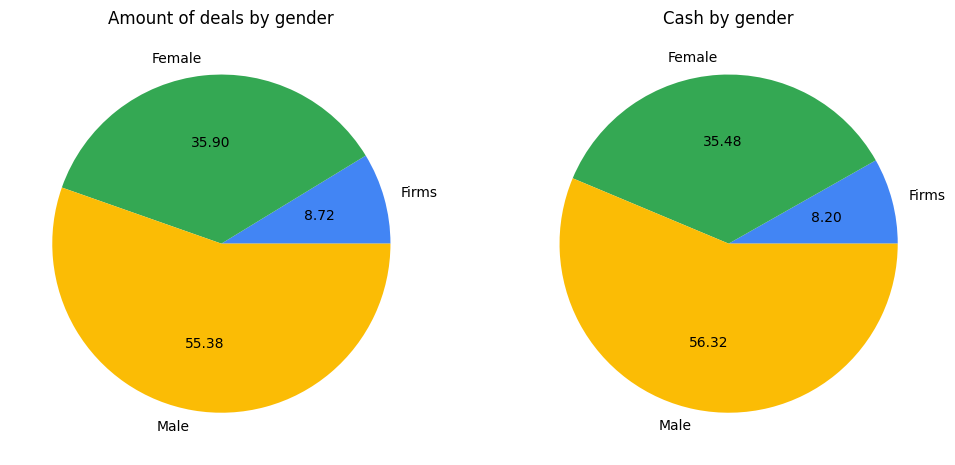

0    Male
Name: Gender, dtype: object

In [51]:
df['Gender'] = df['Gender'].replace('M', 'Male')
df['Gender'] = df['Gender'].replace('F', 'Female')
df.Gender.fillna(value='Firms', inplace=True)

# print(df.groupby(['Gender'])['Price in cents'].sum().sort_values())

# print(df.Gender.value_counts().sort_values())

fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1, title="Amount of deals by gender")
ax1.pie(df.Gender.value_counts().sort_values(),
    labels = df.Gender.value_counts().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05"],
    autopct="%.2f")

ax2 = plt.subplot(1, 2, 2, title="Cash by gender")
ax2.pie(df.groupby(['Gender'])['Price in cents'].sum().sort_values(),
    labels = df.groupby(['Gender'])['Price in cents'].sum().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05"],
    autopct="%.2f")

# colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335"]
plt.show()

df.Gender.mode()

Основной наш клиент мужкого пола, именно с ним заключается больше всего сделок, и еще больше он приносит денег (если учитывать, что фирма берет процент от стоимости дома, а не фикс)

0    48.0
Name: Age at time of purchase, dtype: float64

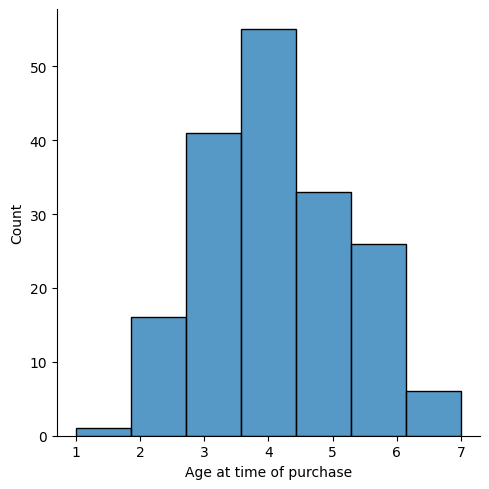

In [52]:
df_age = df['Age at time of purchase'].copy()
df_age = df_age[df_age.notna()] // 10

_ = sns.displot(df_age, bins = df_age.nunique())

df['Age at time of purchase'].mode()

Целевая аудитория компании люди в возрасте 40-49 лет.

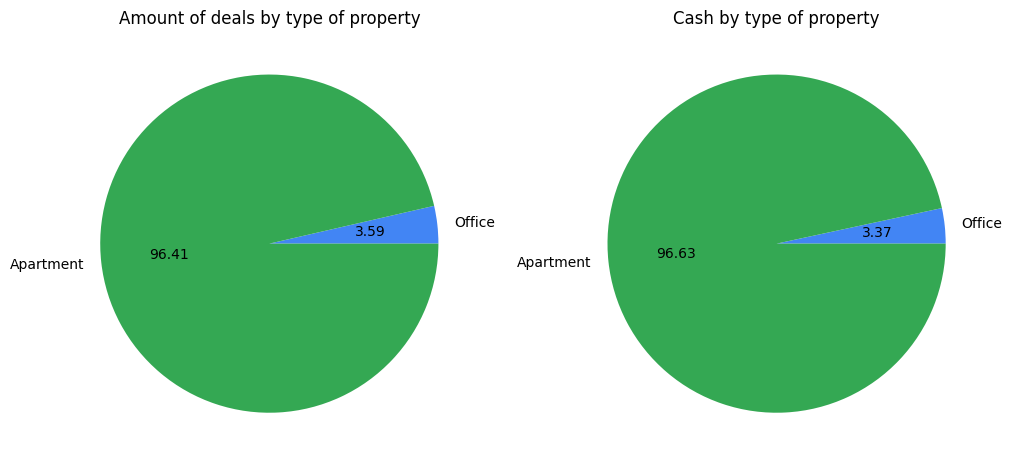

0    Apartment
Name: Type of property, dtype: object

In [53]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1, title="Amount of deals by type of property")
ax1.pie(df['Type of property'].value_counts().sort_values(),
    labels = df['Type of property'].value_counts().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05"],
    autopct="%.2f")

ax2 = plt.subplot(1, 2, 2, title="Cash by type of property")
ax2.pie(df.groupby(['Type of property'])['Price in cents'].sum().sort_values(),
    labels = df.groupby(['Type of property'])['Price in cents'].sum().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05"],
    autopct="%.2f")

# colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335"]
plt.show()

df['Type of property'].mode()

Почти все сделки и почти все выручка компании связаны с жилым сектором.

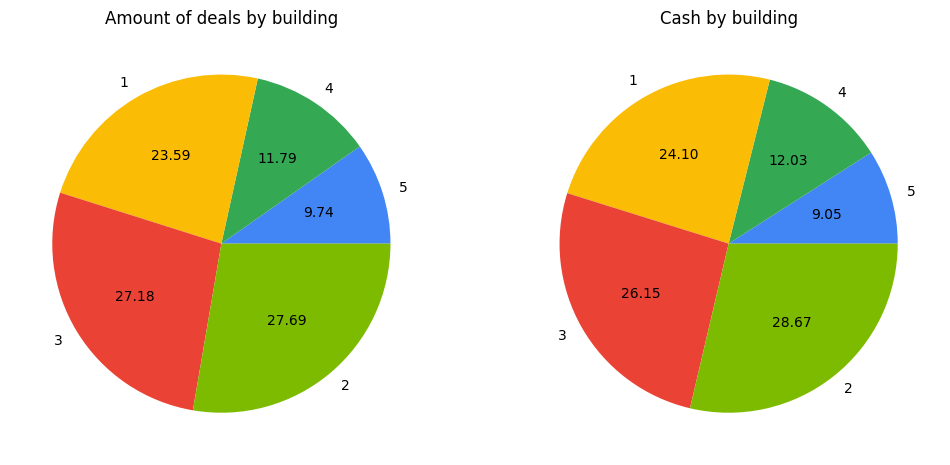

0    2
Name: Building, dtype: int64

In [54]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1, title="Amount of deals by building")
ax1.pie(df['Building'].value_counts().sort_values(),
    labels = df['Building'].value_counts().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

ax2 = plt.subplot(1, 2, 2, title="Cash by building")
ax2.pie(df.groupby(['Building'])['Price in cents'].sum().sort_values(),
    labels = df.groupby(['Building'])['Price in cents'].sum().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

# colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"]
plt.show()

df['Building'].mode()

Основная выручка и основное количество сделок приходит от 2-ух или 3-ёх комнатных квартир.

0    72.563174
Name: Area (ft.), dtype: float64

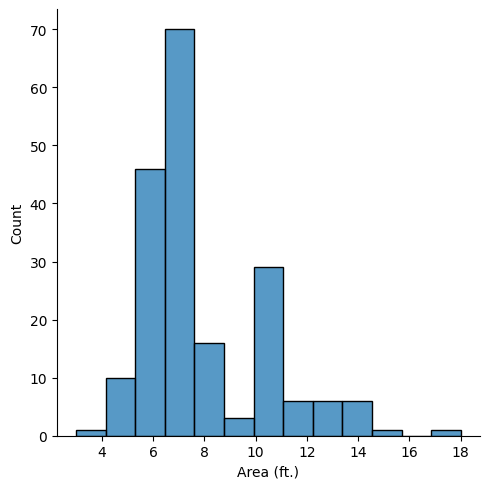

In [56]:
df_area = df['Area (ft.)'].copy()
df_area = df_area / 10.764 // 10

_ = sns.displot(df_area, bins = df_area.nunique())

df['Area (ft.)'].mode() / 10.764

Большинство сделок проходит с недвижимостью площадью 70-79 квадратных метров.

269434.56092307693

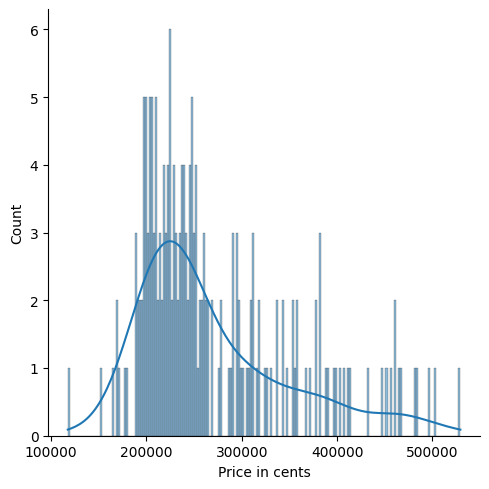

In [67]:
df_price = df['Price in cents'].copy()
df_price = df_price / 100

_ = sns.displot(df_price, kde=True, bins = df_price.nunique())

df['Price in cents'].mean() / 100

Средний чек 270 тыс. долларов.

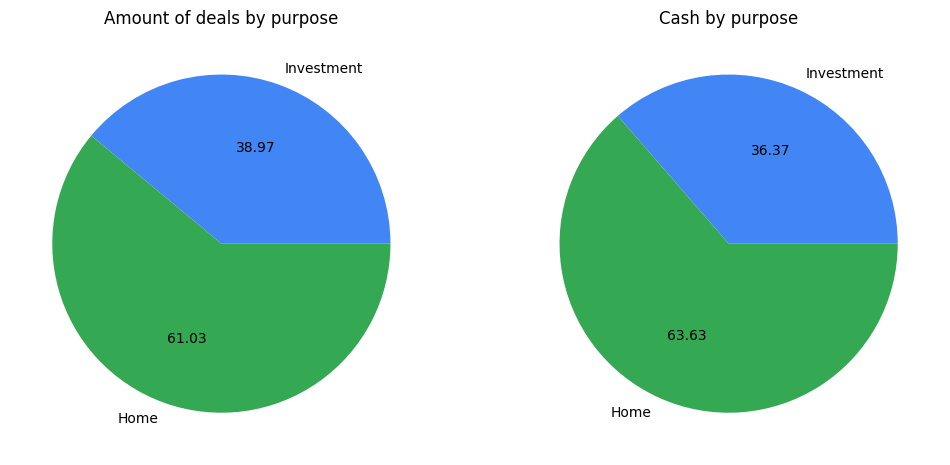

0    Home
Name: Purpose, dtype: object

In [57]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1, title="Amount of deals by purpose")
ax1.pie(df['Purpose'].value_counts().sort_values(),
    labels = df['Purpose'].value_counts().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

ax2 = plt.subplot(1, 2, 2, title="Cash by purpose")
ax2.pie(df.groupby(['Purpose'])['Price in cents'].sum().sort_values(),
    labels = df.groupby(['Purpose'])['Price in cents'].sum().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

# colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"]
plt.show()

df['Purpose'].mode()

Большая часть сделок происходит с объектами для собственных нужд, однако весомую долю имеет недвижимость для инвестиций в нее.

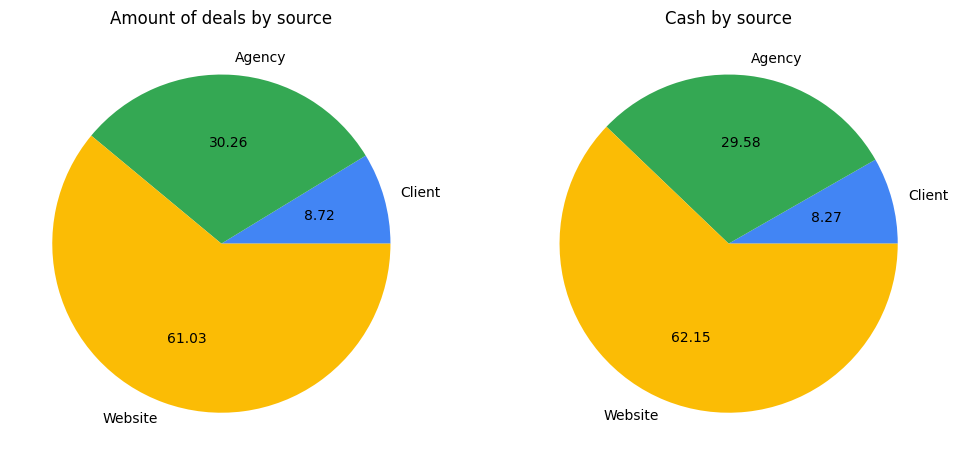

0    Website
Name: Source, dtype: object

In [58]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1, title="Amount of deals by source")
ax1.pie(df['Source'].value_counts().sort_values(),
    labels = df['Source'].value_counts().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

ax2 = plt.subplot(1, 2, 2, title="Cash by source")
ax2.pie(df.groupby(['Source'])['Price in cents'].sum().sort_values(),
    labels = df.groupby(['Source'])['Price in cents'].sum().sort_values().index,
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

# colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"]
plt.show()

df['Source'].mode()

И основная часть клиентов пришла с рекламы на сайтах.

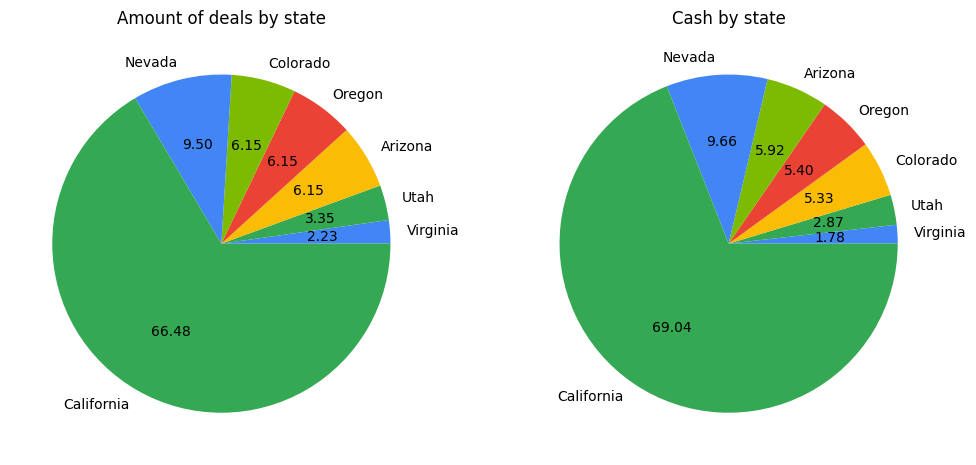

0    California
Name: State, dtype: object

In [73]:
fig = plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1, title="Amount of deals by state")
ax1.pie(df['State'].value_counts().sort_values()[2:],
    labels = df['State'].value_counts().sort_values().index[2:],
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

ax2 = plt.subplot(1, 2, 2, title="Cash by state")
ax2.pie(df.groupby(['State'])['Price in cents'].sum().sort_values()[2:],
    labels = df.groupby(['State'])['Price in cents'].sum().sort_values().index[2:],
    colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"],
    autopct="%.2f")

# colors=["#4285F4", "#34A853", "#FBBC05", "#EA4335", "#7CBB00"]
plt.show()

df['State'].mode()

Основной поток клиентов из Калифорнии.

Целевой клиент компании это мужчина в возрасте 40-49 лет, проживающий в США, Калифорния. Который ищет себе жилое 2-ух комнатное помещение для личных нужд площадью 70-79 кв. метров. Который узнал о нас из рекламы на сайтах.